In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats

sb.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


_Exercise: Connecting the dots and recreating plots from DAOST but using our own favorite dataset._

_1. Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data._

_My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and crete a jitter plot of the arrest times._

In [83]:
df_extr_date_warrants = df.loc[((df.Category == 'WARRANTS') & (df.Date.apply(lambda string: (string.split('/')[2] == '2016') & (string.split('/')[0] == '12')))), ['Category', 'Date']]

df_extr_date_warrants['Day'] = df_extr_date_warrants['Date'].apply(lambda s: s.split('/')[1])

df_extr_date_warrants.sort_values('Date', inplace = True)
df_extr_date_warrants.sort_values('Day', inplace = True)

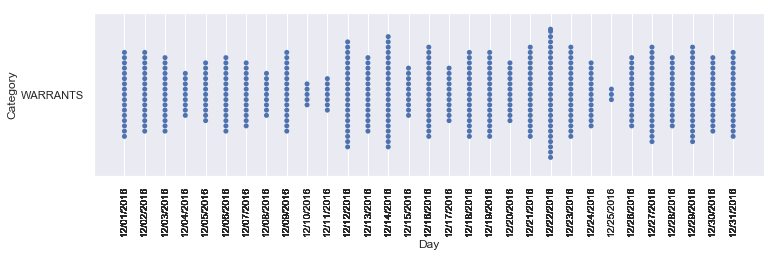

In [147]:
plt.figure(figsize = [12, 3])

ax = sb.swarmplot(y = df_extr_date_runaway['Category'].astype(str), x = df_extr_date_runaway['Day']);

plt.xticks(df_extr_date_runaway['Day'], df_extr_date_runaway['Date']);
plt.xticks(rotation = 90, fontsize = 10);
ax.autoscale_view('tight')

_Last time, we did lots bar-plots. Today, we'll play around with histograms (creating two versions of Figure 2-2). I think the GPS data could be fun to see this way._

_2. This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)_

_Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram -- that gives you the counts and then you do your own plotting._

In [131]:
df_kidn_runaw = df[df.Category.isin(['KIDNAPPING', 'RUNAWAY'])]

In [ ]:
df_kidn_runaw.drop(df_kidn_runaw[(df_kidn_runaw.Category == 'KIDNAPPING') & (df_kidn_runaw.Y > 40)].index, inplace = True)

In [132]:
bin_edges_kidn = pd.np.histogram(df_kidn_runaw[df_kidn_runaw.Category == 'KIDNAPPING'].Y, bins = 50)[1]
bin_edges_runaw = pd.np.histogram(df_kidn_runaw[df_kidn_runaw.Category == 'RUNAWAY'].Y, bins = 50)[1]

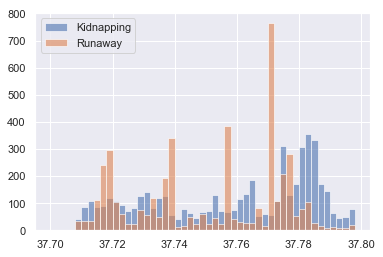

In [150]:
ax = plt.hist(df_kidn_runaw[df_kidn_runaw.Category == 'KIDNAPPING'].Y, bins = pd.np.arange(37.7, 37.8, 0.002), alpha = 0.6);
ax = plt.hist(df_kidn_runaw[df_kidn_runaw.Category == 'RUNAWAY'].Y, bins = pd.np.arange(37.7, 37.8, 0.002), alpha = 0.6);
plt.legend(labels = ['Kidnapping', 'Runaway']);

_3. Next up is recreating Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use gaussian kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot._

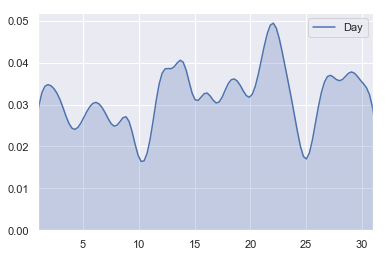

In [166]:
sb.kdeplot(data = df_extr_date_runaway['Day'], bw = 0.70, shade=True, color="b");
plt.xlim(1, 31);

_4. Now grab 25 random timepoints from the dataset you've just plotted and create the same Figure 2-4 plot once again. Does this shed light on why I think KDEs can be misleading?_

In [188]:
df_random_samples = df_extr_date_runaway.sample(25)

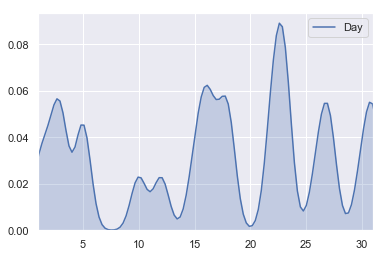

In [189]:
sb.kdeplot(data = df_random_samples['Day'], bw = 0.70, shade=True, color="b");
plt.xlim(1, 31);

_5. Create your own two versions of Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result._

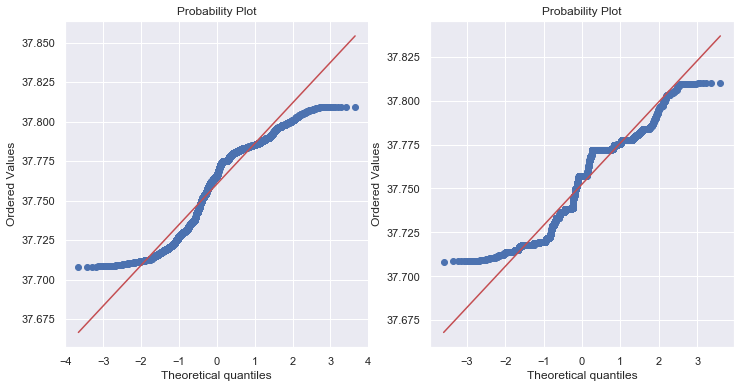

In [241]:
plt.figure(figsize = [12, 6])

plt.subplot(121)
res = stats.probplot(df_kidn_runaw[df_kidn_runaw.Category == 'KIDNAPPING'].Y, plot = plt)
# plt.yticks(np.arange(37.675, 37.825, 0.025))

plt.subplot(122)
res = stats.probplot(df_kidn_runaw[df_kidn_runaw.Category == 'RUNAWAY'].Y, plot = plt)
# plt.yticks(np.arange(37.675, 37.825, 0.025));